e:\oosun\Documents\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.926

Classification Report:
               precision    recall  f1-score   support

     No Rain       0.95      0.96      0.96       437
        Rain       0.72      0.68      0.70        63

    accuracy                           0.93       500
   macro avg       0.84      0.82      0.83       500
weighted avg       0.92      0.93      0.93       500



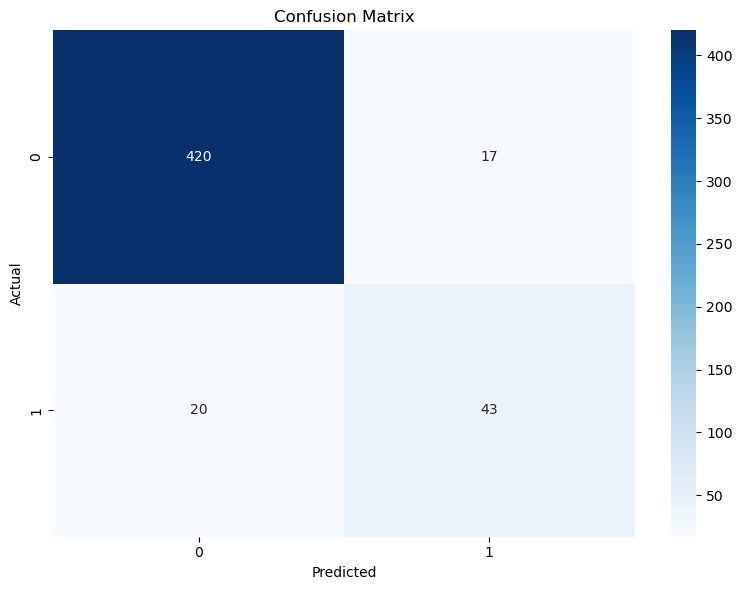

Predicted Grade: rain ,for given weather input


C:\Users\oosun\AppData\Local\Temp\ipykernel_19144\2383272627.py:82: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_input = df_input.apply(pd.to_numeric, errors='ignore')
e:\oosun\Documents\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import GridSearchCV

#Step 1: Import CSVs
df_train = pd.read_csv('../Data/train_data.csv', delimiter=",") 
df_test = pd.read_csv('../Data/test_data.csv', delimiter=",")

#Step 2: Separate features and target
X_train = df_train.drop(columns = ["Rain"])
y_train = df_train['Rain']

X_test = df_test.drop(columns = ["Rain"])
y_test = df_test['Rain']

#Step 3: Feature sclaing
scaler = StandardScaler()  
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Step 4: Tune and train Logistic Regression model using GridSearchCV
#Define the model
ln = LogisticRegression(solver='lbfgs', max_iter=500)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],   
    'penalty': ['l2'],              
    'max_iter': [100, 200, 500]     
}
base_model = LogisticRegression(solver='lbfgs', multi_class='auto')
grid_search = GridSearchCV(base_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Use best model found
ln = grid_search.best_estimator_

#Step 5: Save the model as pkl file in artifacts   
with open("../Artifacts/regression_model.pkl", "wb") as file:
    pickle.dump(ln, file)
with open("../Artifacts/regression_scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

#Setp 6: predictions
predictions = ln.predict(X_test_scaled)

#Step 7: Evaluation
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions, target_names=["No Rain", "Rain"], zero_division=0))

#Confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

#Step 8: Save predictions to CSV
comparison_df = X_test.copy()
comparison_df["Actual Rain"] = y_test.values
comparison_df["Predicted Rain"] = predictions
comparison_df.to_csv("../Artifacts/regression_prediction.csv", index=False)  

#Prediction function
def predict_weather(input_string):
    columns = ["Temperature", "Humidity", "Wind_Speed", "Cloud_Cover", "Pressure"]

    # Convert input string into a list
    input_data = input_string.split(",")

    # Create DataFrame from input
    df_input = pd.DataFrame([input_data], columns=columns)

    # Convert numerical values from strings to floats
    df_input = df_input.apply(pd.to_numeric, errors='ignore')  

    # Predict using the loaded model
    prediction = ln.predict(df_input)
    
    # Rain map
    rain_map = {0: "no rain", 1: "rain"}
    
    predicted_rain = rain_map[prediction[0]]

    return predicted_rain

#Example testing input from the csv file
weather_input = "20.5,65,13.2,60,1012"

#Print predicted grade
print(f"Predicted Grade: {predict_weather(weather_input)} ,for given weather input")

